# 3.2 활성화 함수

## 3.2.2 계단 함수 구현하기

In [2]:
def step_function(x): # x는 실수만 가능
    if x > 0:
        return 1
    else:
        return 0

In [4]:
def step_function(x): # x는 실수만 가능
    y = x > 0
    return y.astype(np.int)

In [5]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [6]:
y = x > 0
y

array([False,  True,  True], dtype=bool)

In [8]:
y = y.astype(np.int) # 배열의 자료형을 변환 astype()을 사용
y

array([0, 1, 1])

## 3.2.3 계단 함수의 그래프

In [10]:
import matplotlib.pylab as plt

In [12]:
def step_fuction(x):
    return np.array(x > 0, dtype=np.int)

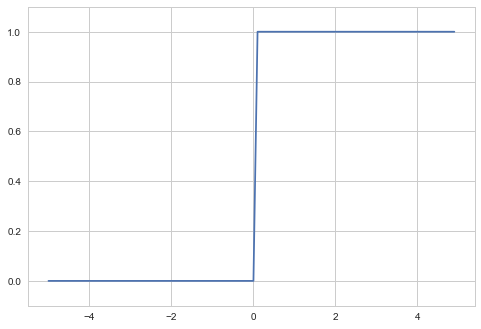

In [16]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

## 3.2.4 시그모이드 함수 구현하기

In [117]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [20]:
x = np.array([-1.0, 1.0, 2.0])

In [21]:
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

In [30]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

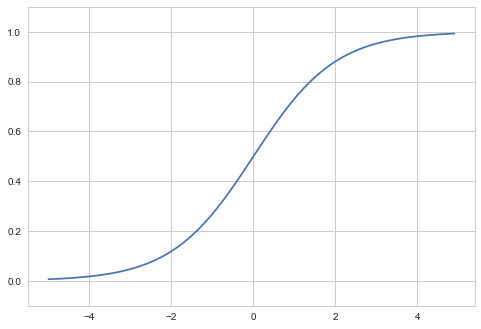

In [32]:
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

# 3.3 다차원 배열의 계산

## 3.3.1 다차원 배열

In [33]:
import numpy as np

In [34]:
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [36]:
np.ndim(A)

1

In [38]:
A.shape

(4,)

In [39]:
A.shape[0]

4

In [40]:
B = np.array([[1, 2], [3, 4], [5, 6]])

In [41]:
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [42]:
np.ndim(B)

2

In [43]:
B.shape

(3, 2)

## 3.3.2 행렬의 내적(행렬 곱)

In [44]:
A = np.array([[1, 2], [3, 4]])
A.shape

(2, 2)

In [47]:
B = np.array([[5, 6], [7, 8]])
B.shape

(2, 2)

In [48]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [49]:
A = np.array([[1, 2, 3], [4, 5, 6]])
A.shape

(2, 3)

In [50]:
B = np.array([[1, 2], [3, 4], [5, 6]])
B.shape

(3, 2)

In [51]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [52]:
C = np.array([[1, 2], [3, 4]])
C.shape

(2, 2)

In [53]:
A.shape

(2, 3)

In [55]:
np.dot(A, C) # 2X3 행렬과 2X2 행렬은 내적할 수 없다. 오류 발생

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [56]:
A = np.array([[1, 2], [3, 4], [5, 6]])
A.shape

(3, 2)

In [58]:
B = np.array([7, 8])
B.shape

(2,)

In [59]:
np.dot(A, B)

array([23, 53, 83])

## 3.3.3 신경망의 내적

In [60]:
X = np.array([1, 2])
X.shape

(2,)

In [61]:
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [62]:
W.shape

(2, 3)

In [63]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


# 3.4 3층 신경망 구현하기

## 3.4.2 각 층의 신호 전달 구현하기

In [65]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [67]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[ 0.3  0.7  1.1]
[ 0.57444252  0.66818777  0.75026011]


In [68]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [69]:
print(A2)
print(Z2)

[ 0.51615984  1.21402696]
[ 0.62624937  0.7710107 ]


In [70]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3) # 혹은 Y = A3

## 3.4.3 구현 정리

In [76]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

In [77]:
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [80]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)

In [81]:
print(y)

[ 0.31682708  0.69627909]


## 3.5.1 항등 함수와 소프트맥스 함수 구현하기

In [82]:
a = np.array([0.3, 2.9, 4.0])

In [83]:
exp_a = np.exp(a) # 지수 함수
print(exp_a)

[  1.34985881  18.17414537  54.59815003]


In [84]:
sum_exp_a = np.sum(exp_a) # 지수 함수의 합
print(sum_exp_a)

74.1221542102


In [86]:
y = exp_a / sum_exp_a

In [121]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

# 3.5.2 소프트맥스 함수 구현 시 주의점

In [88]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) # 소프트맥스 함수의 계산/ 제대로 계산이 되지 않는다

C:\Users\Yulma\Anaconda2\envs\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\Yulma\Anaconda2\envs\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([ nan,  nan,  nan])

In [90]:
c = np.max(a) # c = 1010(최댓값)
a - c

array([  0, -10, -20])

In [92]:
np.exp(a -  c) / np.sum(np.exp(a - c))

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

In [93]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로 대책
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

## 3.5.3 소프트맥스 함수의 특징

In [94]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[ 0.01821127  0.24519181  0.73659691]


In [95]:
np.sum(y)

1.0

# 3.6 손글씨 숫자 인식

## 3.6.1 MNIST 데이터셋

In [7]:
from dataset.mnist import load_mnist

In [9]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [10]:
# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [99]:
from PIL import Image

In [100]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [101]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [102]:
img = x_train[0]
label = t_train[0]
print(label)

5


In [103]:
print(img.shape)

(784,)


In [104]:
img = img.reshape(28, 28) # 원래 이미지의 모양으로 변형
print(img.shape)

(28, 28)


In [105]:
img_show(img)

## 3.6.2 신경망의 추론 처리

In [111]:
import pickle

In [112]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

In [113]:
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

In [118]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [119]:
x, t = get_data()
network = init_network()

In [135]:
%%time

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
Wall time: 374 ms


## 3.6.3 배치 처리

In [124]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [125]:
x.shape

(10000, 784)

In [126]:
x[0].shape

(784,)

In [127]:
W1.shape

(784, 50)

In [128]:
W2.shape

(50, 100)

In [130]:
W3.shape

(100, 10)

In [131]:
x, t = get_data()
network = init_network()

In [146]:
%%time

batch_size = 100 # 배치 크기
accurancy_cnt = 0

for i in range(len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352
Wall time: 0 ns


In [145]:
x[0:2]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)